In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn



In [115]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [116]:
train = pd.read_csv('leaf-classification/train.csv')
test = pd.read_csv('leaf-classification/test.csv')

In [117]:
train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [119]:
train.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [120]:
def encode(train, test):
    le = LabelEncoder().fit(train.species)
    labels =  le.transform(train.species)
    classes = list(le.classes_)
    test_ids = test.id
    train = train.drop(['species', 'id'], axis=1)
    test = test.drop(['id'], axis=1)
    return train, labels, test, test_ids, classes

train, labels, test, test_ids, classes = encode(train, test)
train.head(1)


,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.0,0.00293,0.00293,0.035156,0.0,0.0,0.004883,0.0,0.025391


In [121]:
labels
sss = StratifiedShuffleSplit(  n_splits=10, test_size=0.2, random_state=23)


In [122]:
sss.get_n_splits(labels)


10

In [123]:
for train_index, test_index in sss.split(train, labels):
    print("train index: ", train_index, "test index: ", test_index)
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    
X_train.size

train index:  [309 780 839 621 630 219 682 947 718 842 273 501 383 914 709  24  60 678
 692 225 493 452 778 791 422 983 597 518 706 203 446 936 553 823 830 124
 201 290 175 883 715 955 479 953 381 858 739 773 115  36 230 775 921 395
  45 910 701 121 481 305 958 710   2 956 155 864 287 876 734 455 248 324
 749 444 266 391 596 766  16 472 612 790 389 646 237 278  92 525 783 198
 724 454 834 841 491 604 406 758 212 197 728 649 969  71 284 971  69 304
 369 904 177 769 326 517 777 801 137 303  35 329 717 307 693 328 988 656
 512  90 960 289 249   3 733 608 826  66 764  51 815 172 732 886 506 648
 427 654 319 938 578 968 213 962 789 222 989 310 974 819 337  14 672 850
 335 419 981 100 725 431  99 112 377 364 370 340 772 807  31 257 325 417
 200  48  22 862 376 633 250 538 498 313 985 919 930 933 623 684 576 663
 311 809 855 240  17 598 245 570 308 104 458 978 438 527 551 601 657 907
 448 639  95 282 891 946  18 463 860 358 480  93 494  97 268 193 785 529
 652 404 912  79 856 831 408 880 853 

152064

In [124]:
# Sklearn Classifier Showdown
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]


In [125]:
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

In [129]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    train_predictionsd = clf.predict_proba(X_test)
#     print(type(y_test), type(train_predictions))
#     print(y_test.size, train_predictions.size)
#     print(y_test)
#     print(train_predictions)
    ll = log_loss(y_test, clf.predict_proba(X_test))
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns = log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 88.8889%
Log Loss: 1.5755075129933762
SVC
****Results****
Accuracy: 81.8182%
Log Loss: 4.595121905457983
NuSVC
****Results****
Accuracy: 88.3838%
Log Loss: 2.476988373663575
DecisionTreeClassifier
****Results****
Accuracy: 65.1515%
Log Loss: 12.03624025883261
RandomForestClassifier
****Results****
Accuracy: 90.4040%
Log Loss: 1.1182255641646592
AdaBoostClassifier
****Results****
Accuracy: 4.5455%
Log Loss: 4.198743314459643
GradientBoostingClassifier
****Results****
Accuracy: 57.5758%
Log Loss: 2.625431110009055
GaussianNB
****Results****
Accuracy: 57.0707%
Log Loss: 14.827252492813216
LinearDiscriminantAnalysis
****Results****
Accuracy: 97.9798%
Log Loss: 0.9301977763139285
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 2.0202%
Log Loss: 33.84102333642773


/home/xavient/Desktop/manoj/python/globalenv/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:516: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
/home/xavient/Desktop/manoj/python/globalenv/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:516: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


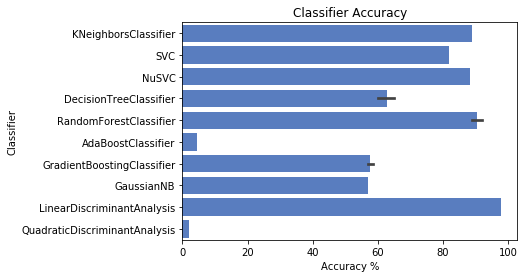

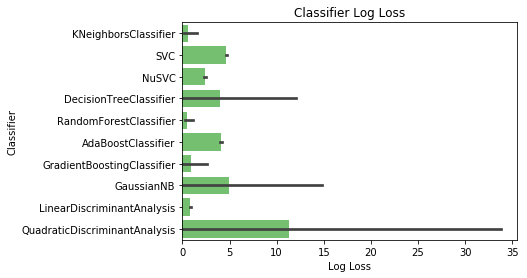

In [130]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()